# Exploratory data analysis

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt  

In [2]:
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")
dfgendersubmission = pd.read_csv("gender_submission.csv")

In [3]:
dftrain.shape #Data base dimension

(891, 12)

In [4]:
dftrain.info() #Information of the variables in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dftrain.head() #Dataframe header

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#pd.set_option('display.max_rows', dftrain.shape[0]+1) #View full dataframe
#dftrain

In [7]:
dftrain.isnull().sum() #Variables with null data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the data base we analyze different variables, some variables will be discarded the varaibles because they are not considered relevant  in the model

The discarted variable are:
Name

the other variables are considered relevant to the model,

Survived: It is the dependent variable of the model

Class: This variable shows us in the class that the passengers were traveling in the barcode, it can be explanatory since it is supposed that they give priority to the first classes

Sex: This variable shows us the sex of the passengers, it can be explanatory since it is supposed that they give priority to women

Age: it is the variable with the age of the passengers, it can be explanatory since it is supposed that they give priority to younger people

SibSp: It is the variable that shows us the number of siblings that the passenger has, it can be explanatory since it is supposed that they give priority to those who travel with their siblings.

Parch: It is the variable that shows us the number of children that the passenger has, it can be explanatory since it is supposed that they give priority to people who have children so that they are not orphaned

Cabin: It is the variable that shows us in the cabin the passenger was located, it can be explanatory since it is assumed that it is more likely that people who were closer to the bar code board would touch them in the lifeboats, and so you have more time to save yourself.

Fare:This variable shows us the cost of the passenger ticket, it allows us to corroborate the location of the passenger on the ship.

Embarked:This variable indicates the port where the passenger boarded the ship.


In [8]:
dftrain = dftrain.drop(["Name","Ticket","Fare","Embarked"],axis=1) #We discard the variables that are not of interest
dftrain

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,NaN
887,888,1,1,female,19.0,0,0,B42
888,889,0,3,female,NaN,1,2,NaN
889,890,1,1,male,26.0,0,0,C148


In [9]:
dftrain = dftrain.fillna(0) #Replace the null data with 0s
dftrain

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,0
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,0
887,888,1,1,female,19.0,0,0,B42
888,889,0,3,female,0.0,1,2,0
889,890,1,1,male,26.0,0,0,C148


In [10]:
dftrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Cabin          0
dtype: int64

In [11]:
dftrain = dftrain.set_index("PassengerId") #Change the index for passanger Id
dftrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,0
2,1,1,female,38.0,1,0,C85
3,1,3,female,26.0,0,0,0
4,1,1,female,35.0,1,0,C123
5,0,3,male,35.0,0,0,0
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,0
888,1,1,female,19.0,0,0,B42
889,0,3,female,0.0,1,2,0


In [12]:
matrix= dftrain['Cabin'].unique() #Unique values of the Cabin variable

len(matrix) #Number of unique values of the Cabin variable

148

In [13]:
print(matrix)

[0 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [14]:
matriz2= dftrain['Sex'].unique()
len(matriz2) #Number of unique values of the Sex variable

2

It is verified that in the variables is the total of the individuals

In [15]:
dftrain['Sex'].value_counts() #Number of men / women in the titanic

male      577
female    314
Name: Sex, dtype: int64

In [16]:
women = dftrain.loc[dftrain.Sex == "female"]["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [17]:
male = dftrain.loc[dftrain.Sex == "male"]["Survived"]
rate_male = sum(male)/len(male)
print("% of male who survived:", rate_male)

% of male who survived: 0.18890814558058924


In [18]:
dftrain['Pclass'].value_counts() #Number of people who had per class in the titanic

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
#percentage of survivors by class

firstclass = dftrain.loc[dftrain.Pclass == 1]["Survived"]
rate_firstclass = sum(firstclass)/len(firstclass)
print("% of first class peoples who survived", rate_firstclass)

secondclass = dftrain.loc[dftrain.Pclass == 2]["Survived"]
rate_secondclass = sum(secondclass)/len(secondclass)
print("% of second class peoples who survived", rate_secondclass)

thirdclass = dftrain.loc[dftrain.Pclass == 3]["Survived"]
rate_thirdclass = sum(thirdclass)/len(thirdclass)
print("% of third class peoples who survived", rate_thirdclass)






% of first class peoples who survived 0.6296296296296297
% of second class peoples who survived 0.47282608695652173
% of third class peoples who survived 0.24236252545824846


In [20]:
dftrain.describe() 

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.799293,0.523008,0.381594
std,0.486592,0.836071,17.596074,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [21]:
dftrain['Sex'].replace(['female','male'],[0,1],inplace=True) #change the variable Sex female=0 and male=1
dftrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,0
2,1,1,0,38.0,1,0,C85
3,1,3,0,26.0,0,0,0
4,1,1,0,35.0,1,0,C123
5,0,3,1,35.0,0,0,0
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,0
888,1,1,0,19.0,0,0,B42
889,0,3,0,0.0,1,2,0



Number of women and men in train dataset

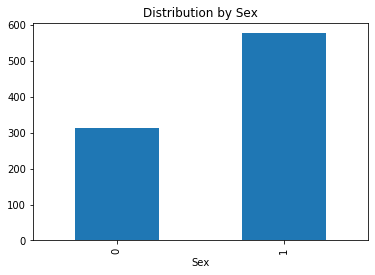

In [22]:
#Graph of variable sex on the boat
dftrain.groupby('Sex').size().plot(kind='bar')
plt.title('Distribution by Sex')
plt.show()


In [23]:
percent_survivors = (dftrain[dftrain.Survived
                             > 0]['Survived'].count() * 1.0
       / dftrain['Survived'].count()) * 100.0
print("The percentage of survivors in the database is {0:.2f}%"
      .format(percent_survivors))

The percentage of survivors in the database is 38.38%


In [24]:
#survivors subset 
dftrain_survivors = dftrain[dftrain.Survived > 0]

In [25]:
dftrain_survivors

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
2,1,1,0,38.0,1,0,C85
3,1,3,0,26.0,0,0,0
4,1,1,0,35.0,1,0,C123
9,1,3,0,27.0,0,2,0
10,1,2,0,14.0,1,0,0
...,...,...,...,...,...,...,...
876,1,3,0,15.0,0,0,0
880,1,1,0,56.0,0,1,C50
881,1,2,0,25.0,0,1,0


In [26]:
len(dftrain_survivors)

342

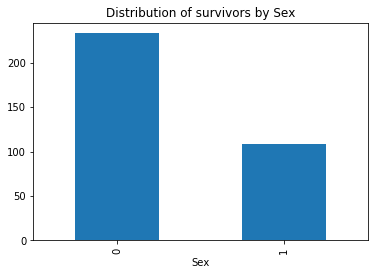

In [27]:
dftrain_survivors.groupby('Sex').size().plot(kind='bar')
plt.title('Distribution of survivors by Sex')
plt.show()  #Male=1 Female=0

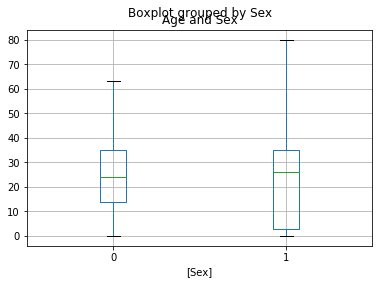

In [28]:
# Age and Sex 
dftrain_survivors[(dftrain_survivors.Age <= 100)
             & (dftrain_survivors.Sex.isin(['0', '1'])
               )][['Age', 'Sex']].boxplot(by='Sex')
plt.title('Age and Sex')
plt.show()

In [29]:
# Mean of Female ages
dftrain_survivors[dftrain_survivors.Sex == 0][['Age']].mean()

Age    24.390558
dtype: float64

In [30]:
#Mean of survivors class
dftrain_survivors[['Pclass']].mean()

Pclass    1.950292
dtype: float64

In [31]:
#Mean of Male ages
dftrain_survivors[dftrain_survivors.Sex == 1][['Age']].mean()

Age    23.272202
dtype: float64

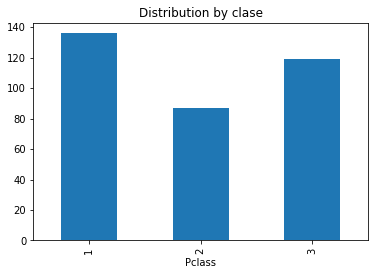

In [32]:
dftrain_survivors.groupby('Pclass').size().plot(kind='bar')
plt.title('Distribution by clase')
plt.show() 

In [33]:
pclass_gender_survival_count_df= dftrain.groupby(['Pclass','Sex'])['Survived'].sum()
dftrain.groupby(['Pclass','Sex']).count()
dftrain['count'] = 1 # Add column
dftrain.groupby(['Pclass','Sex','count']).count()
dftrain.groupby(['Pclass']).sum()

,Survived,Sex,Age,SibSp,Parch,count
Pclass,,,,,,
1,136,122,7111.42,90,77,216
2,87,108,5168.83,74,70,184
3,119,347,8924.92,302,193,491


In [34]:
pclass_gender_survival_count_df

Pclass  Sex
1       0      91
        1      45
2       0      70
        1      17
3       0      72
        1      47
Name: Survived, dtype: int64

In [35]:
#Grouped age in a range (10)
Age = pd.cut(dftrain['Age'], range(0, 100, 10))
dftrain['Age'] = Age


In [36]:
dftrain_survivors

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
2,1,1,0,38.0,1,0,C85
3,1,3,0,26.0,0,0,0
4,1,1,0,35.0,1,0,C123
9,1,3,0,27.0,0,2,0
10,1,2,0,14.0,1,0,0
...,...,...,...,...,...,...,...
876,1,3,0,15.0,0,0,0
880,1,1,0,56.0,0,1,C50
881,1,2,0,25.0,0,1,0


In [37]:
pclass_gender_survival_count_df= dftrain.groupby(['Pclass','Age'])['Survived'].sum()
pclass_gender_survival_count_df

Pclass  Age     
1       (0, 10]      2.0
        (10, 20]    15.0
        (20, 30]    29.0
        (30, 40]    37.0
        (40, 50]    21.0
        (50, 60]    15.0
        (60, 70]     2.0
        (70, 80]     1.0
        (80, 90]     NaN
2       (0, 10]     17.0
        (10, 20]     9.0
        (20, 30]    25.0
        (30, 40]    19.0
        (40, 50]    10.0
        (50, 60]     2.0
        (60, 70]     1.0
        (70, 80]     NaN
        (80, 90]     NaN
3       (0, 10]     19.0
        (10, 20]    20.0
        (20, 30]    30.0
        (30, 40]    13.0
        (40, 50]     2.0
        (50, 60]     0.0
        (60, 70]     1.0
        (70, 80]     0.0
        (80, 90]     NaN
Name: Survived, dtype: float64